<a href="https://colab.research.google.com/github/skshivam789/ML-Projects/blob/master/PotholeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading dataset from kaggle

In [0]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [0]:
%cp kaggle.json /content/

In [0]:
%cd /content/

/content


In [0]:
! mkdir ~/.kaggle


In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets download -d atulyakumar98/pothole-detection-dataset

 99% 192M/194M [00:01<00:00, 107MB/s] 
100% 194M/194M [00:02<00:00, 100MB/s]


In [0]:
! unzip pothole-detection-dataset.zip

# Loading Data

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
%cd /content/normal/

/content/normal


In [0]:
%rm 226.jpg

In [0]:
%rmdir .ipynb_checkpoints

rmdir: failed to remove '.ipynb_checkpoints': No such file or directory


In [0]:
list1 = os.listdir('/content/potholes/')
list2 = os.listdir('/content/normal/')

In [0]:
print(len(list1),len(list2))

329 351


In [0]:
list1[260]

'132.jpg'

In [0]:
list2[263]

'96.jpg'

In [0]:
X = []
Y = []
for item in list1 :
  img = cv2.imread('/content/potholes/'+item)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(200,200))
  img = cv2.normalize(img,None,0,255,cv2.NORM_MINMAX)
  X.append(img)
  Y.append(1)
for item in list2 :
  img = cv2.imread('/content/normal/'+item)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(200,200))
  img = cv2.normalize(img,None,0,255,cv2.NORM_MINMAX)
  X.append(img)
  Y.append(0)



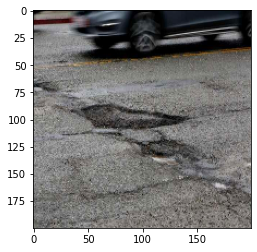

In [0]:
plt.imshow(X[10])

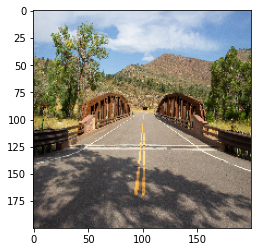

In [0]:
plt.imshow(X[390])

 



In [0]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(680, 200, 200, 3)
(680,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=0)

# Training models

In [0]:
import tensorflow as tf
from tensorflow import keras


In [0]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [0]:

X_train_T = tf.convert_to_tensor(X_train,dtype=tf.float32)
Y_train_T = tf.convert_to_tensor(Y_train,dtype=tf.float32)
X_test_T = tf.convert_to_tensor(X_test,dtype=tf.float32)
Y_test_T = tf.convert_to_tensor(Y_test,dtype=tf.float32)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(1))

In [0]:
model.compile(optimizer='adam',loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [0]:
with tf.device('/GPU:0'):
  model.fit(X_train,Y_train,batch_size=32,epochs=10,validation_split=0.1,use_multiprocessing=True)

Epoch 1/10
17/17 [==============================] - 0s 23ms/step - loss: 1382.4379 - accuracy: 0.6596 - val_loss: 48.3885 - val_accuracy: 0.8966
Epoch 2/10
17/17 [==============================] - 0s 19ms/step - loss: 32.0359 - accuracy: 0.8327 - val_loss: 7.3640 - val_accuracy: 0.9138
Epoch 3/10
17/17 [==============================] - 0s 19ms/step - loss: 7.6882 - accuracy: 0.9154 - val_loss: 31.7957 - val_accuracy: 0.6897
Epoch 4/10
17/17 [==============================] - 0s 19ms/step - loss: 6.3112 - accuracy: 0.9385 - val_loss: 6.4847 - val_accuracy: 0.8966
Epoch 5/10
17/17 [==============================] - 0s 19ms/step - loss: 10.1992 - accuracy: 0.9038 - val_loss: 28.3542 - val_accuracy: 0.8276
Epoch 6/10
17/17 [==============================] - 0s 19ms/step - loss: 4.2694 - accuracy: 0.9596 - val_loss: 6.4667 - val_accuracy: 0.9483
Epoch 7/10
17/17 [==============================] - 0s 19ms/step - loss: 2.3860 - accuracy: 0.9750 - val_loss: 9.9221 - val_accuracy: 0.9310
Epoch

In [0]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 7ms/step - loss: 15.1626 - accuracy: 0.9118


[15.162585258483887, 0.9117646813392639]

In [0]:
test_model(model,X_train,Y_train)

0.9930795847750865

In [0]:
test_model(model,X_test,Y_test)

0.9117647058823529

In [0]:
model.save('pothole_classification_model')

INFO:tensorflow:Assets written to: pothole_classification_model/assets


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(5,5),activation='relu',input_shape=(200,200,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(1))


In [0]:
model.compile(optimizer='adam',loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [0]:
with tf.device('/GPU:0'):
  model.fit(X_train,Y_train,batch_size=32,epochs=10,validation_split=0.1,use_multiprocessing=True)

Epoch 1/10
17/17 [==============================] - 1s 36ms/step - loss: 364.9466 - accuracy: 0.5115 - val_loss: 0.7136 - val_accuracy: 0.6897
Epoch 2/10
17/17 [==============================] - 0s 15ms/step - loss: 0.4986 - accuracy: 0.7788 - val_loss: 0.6991 - val_accuracy: 0.6379
Epoch 3/10
17/17 [==============================] - 0s 15ms/step - loss: 0.2662 - accuracy: 0.8635 - val_loss: 1.0398 - val_accuracy: 0.6207
Epoch 4/10
17/17 [==============================] - 0s 16ms/step - loss: 0.1002 - accuracy: 0.9519 - val_loss: 1.6237 - val_accuracy: 0.6552
Epoch 5/10
17/17 [==============================] - 0s 16ms/step - loss: 0.0466 - accuracy: 0.9808 - val_loss: 3.2312 - val_accuracy: 0.6897
Epoch 6/10
17/17 [==============================] - 0s 16ms/step - loss: 0.0682 - accuracy: 0.9865 - val_loss: 0.7503 - val_accuracy: 0.7241
Epoch 7/10
17/17 [==============================] - 0s 15ms/step - loss: 0.0296 - accuracy: 0.9865 - val_loss: 1.1875 - val_accuracy: 0.6724
Epoch 8/10


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
def test_model(model,X_test,Y_test) :
  Y_pred =keras.activations.sigmoid(model.predict(X_test))
  Y_pred2 =np.array(Y_pred>=0.5)
  Ypred = Y_pred2.astype(np.int)
  score = accuracy_score(Ypred,Y_test)
  return score


In [0]:
test_model(model,X_test,Y_test)

0.7058823529411765